# Temperature Forecast Project

### Dataset Information:

 This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

### Problem Statement

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea.

### Importing Libraries

In [181]:
import pandas as pd # for handling dataset
import numpy as np  # for mathematical computation

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew

# for visualization 
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns

import pickle

import warnings
warnings.filterwarnings('ignore')

In [182]:
# reading the data
df=pd.read_csv(r'D:\DATATRAINED\DTRND-Project\EVALUATION\3rd week\temperature.csv') 

In [183]:
df.head() # to display top 5 rows from the dataset

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


### Attribute Information

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
    
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
    
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6

4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
    
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
    
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
    
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
    
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
    
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
    
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
    
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
    
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
    
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
    
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
    
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
    
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
    
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
    
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
    
19. lat - Latitude (Â°): 37.456 to 37.645
    
20. lon - Longitude (Â°): 126.826 to 127.135
    
21. DEM - Elevation (m): 12.4 to 212.3
    
22. Slope - Slope (Â°): 0.1 to 5.2
    
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
    
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
    
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

In [184]:
print('Total no of rows & columns: ',df.shape) # to check number of rows & columns

Total no of rows & columns:  (7752, 25)


In [185]:
print('List of columns: ',df.columns) # to display names of all the columns in the dataset

List of columns:  Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')


In [186]:
df.info() # to know datatype of each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [187]:
# to count number of unique values in each columns 
df.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

In [188]:
# to list categorical features in our dataset
cat_features=[i for i in df.columns if df.dtypes[i]=='object']
cat_features

['Date']

In [189]:
# to list continous features in our dataset
con_features=[i for i in df.columns if df.dtypes[i]=='float64']
con_features

['station',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

In [190]:
df.describe() # to get high understanding of dataset or to get overview/stats of the dataset

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


#### 
1. Count is not same for all features so there will be null values.
2. Data is messed up for LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3 and LDAPS_PPT4 as their standard deviation value is greater than their mean value.

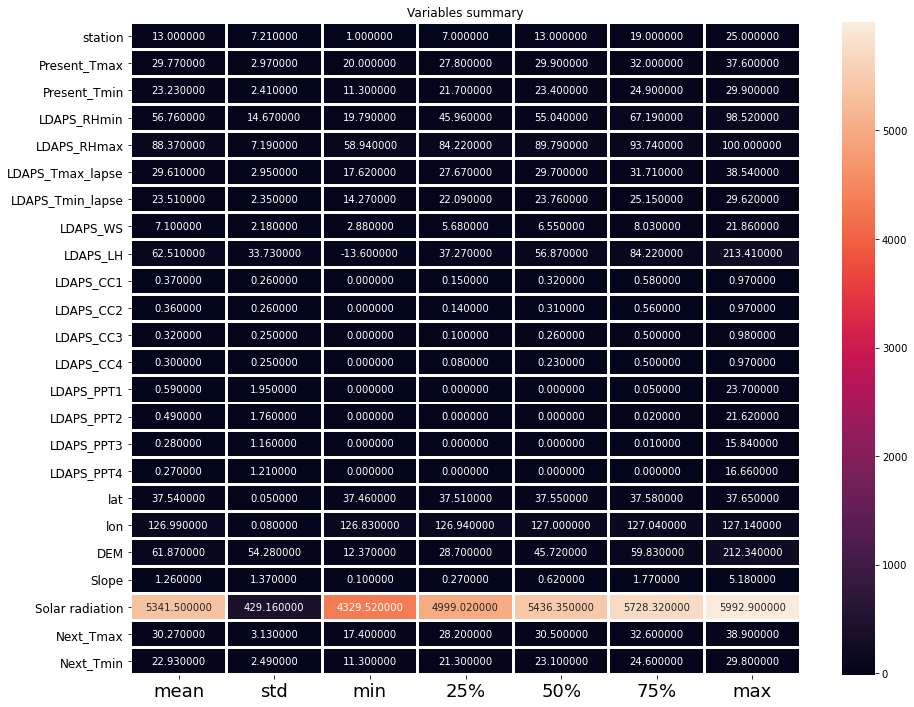

In [191]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

#### From the above plotting we are determining mean, standard deviation, minimum and maximum values of above columns. It helps us further in data cleaning.

### Prediction for Next_Tmax

In [192]:
# We have two targets to predict, so dropping 2nd target variable 'Next_Tmin'
df=df.drop(columns='Next_Tmin')

In [193]:
df.isnull().sum()  # to check null values 

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
dtype: int64

#### Null values present in dataset.

In [194]:
# to count number of unique values in 'station' column
df['station'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., nan])

In [195]:
# dropping 'station' column because its just a serial number
df=df.drop(columns='station')

In [196]:
# to change format
df['Date']=pd.to_datetime(df['Date'])
df['Date']

0      2013-06-30
1      2013-06-30
2      2013-06-30
3      2013-06-30
4      2013-06-30
          ...    
7747   2017-08-30
7748   2017-08-30
7749   2017-08-30
7750          NaT
7751          NaT
Name: Date, Length: 7752, dtype: datetime64[ns]

In [197]:
# splitting Date into Year,Month and Day
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

In [198]:
# dropping 'Date' column
df.drop('Date',axis=1,inplace=True)

In [199]:
# treating null values 

df['Present_Tmax']=df['Present_Tmax'].fillna(df['Present_Tmax'].median())
df['Present_Tmin']=df['Present_Tmin'].fillna(df['Present_Tmin'].median())

df['LDAPS_RHmin']=df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].median())
df['LDAPS_RHmax']=df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].median())

df['LDAPS_Tmax_lapse']=df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].median())
df['LDAPS_Tmin_lapse']=df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].median())

df['LDAPS_WS']=df['LDAPS_WS'].fillna(df['LDAPS_WS'].median())
df['LDAPS_LH']=df['LDAPS_LH'].fillna(df['LDAPS_LH'].median())

df['LDAPS_CC1']=df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].median())
df['LDAPS_CC2']=df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].median())
df['LDAPS_CC3']=df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].median())
df['LDAPS_CC4']=df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].median())

df['LDAPS_PPT1']=df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].median())
df['LDAPS_PPT2']=df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].median())
df['LDAPS_PPT3']=df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].median())
df['LDAPS_PPT4']=df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].median())

df['Year']=df['Year'].fillna(df['Year'].median())
df['Month']=df['Month'].fillna(df['Month'].median())
df['Day']=df['Day'].fillna(df['Day'].median())
df['Next_Tmax']=df['Next_Tmax'].fillna(df['Next_Tmax'].median())

In [200]:
df.isnull().sum() # to check null values again

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Year                0
Month               0
Day                 0
dtype: int64

#### No null values present in dataset now. Good to go ahead.

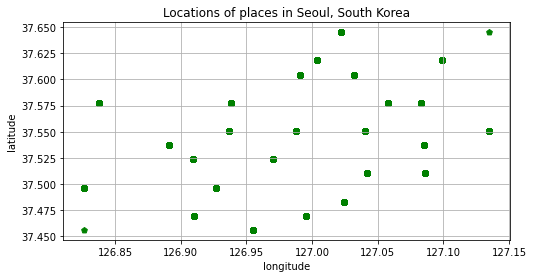

In [201]:
# to visualize latitude and longitude of Seoul, South Korea
x=df['lon']
y=df['lat']

plt.subplots(figsize=(8,4))
plt.scatter(x, y, c ="green",marker='p')
plt.title('Locations of places in Seoul, South Korea')
plt.xlabel('longitude')
plt.ylabel('latitude')
# To show the plot
plt.grid()
plt.show()

#### These are the co-ordinates where observations related to temperature, humidity, windspeed etc of Seoul, South Korea was observed by LDAPS model.

Text(0.5, 1.0, 'Range of Maximum Air Temperature(Present day)')

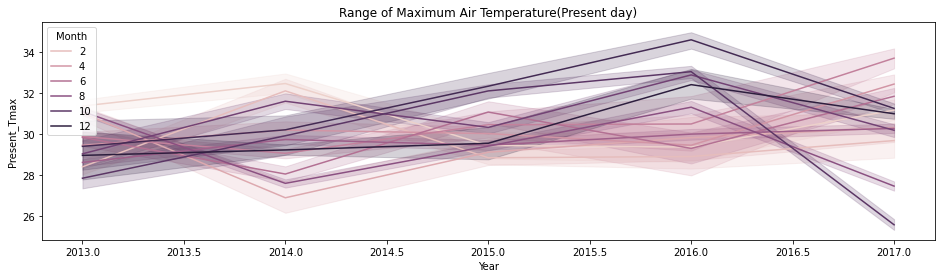

In [202]:
# to visualize 'Present_Tmax' vs 'Year'
plt.subplots(figsize=(16,4))
sns.lineplot(x='Year', y='Present_Tmax',hue='Month', data=df)
plt.title('Range of Maximum Air Temperature(Present day)')

#### Maximum Air Temperature(present day) was recorded in the year-2016 in the month of October to December.

<AxesSubplot:xlabel='Year', ylabel='Solar radiation'>

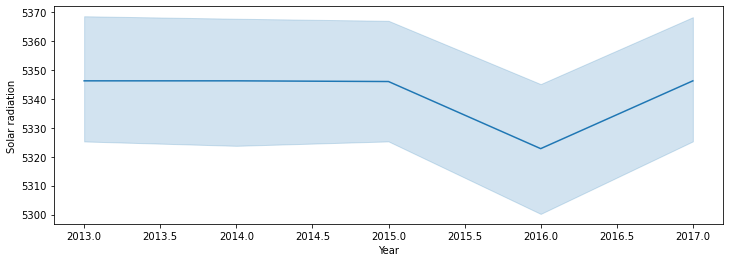

In [203]:
# to visualize 'Solar radiation' relation with 'Year'
plt.subplots(figsize=(12,4))
sns.lineplot(x='Year', y='Solar radiation', data=df)

#### Solar radiation is very much constant from year(2013-2015) and then there is a considerable drop in the year 2016.

Text(0.5, 1.0, 'Range of Maximum Relative Humidity')

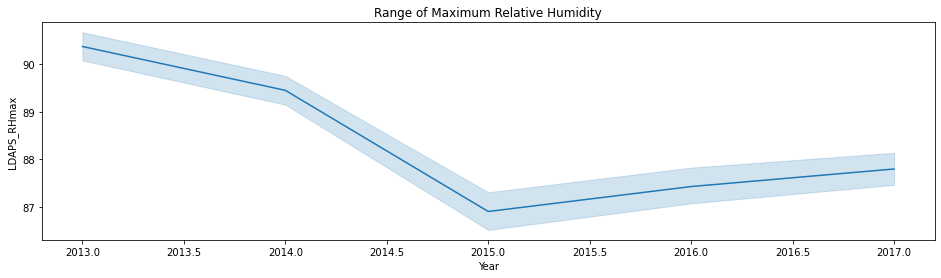

In [204]:
# to visualize 'Maximum Relative Humidity' vs 'Year'
plt.subplots(figsize=(16,4))
sns.lineplot(x='Year', y='LDAPS_RHmax', data=df)
plt.title('Range of Maximum Relative Humidity')

#### Maximum Relative Humidity forecasted by LDAPs was in the starting year 2013, from that year till 2017 it has been decreased. 

<AxesSubplot:xlabel='Year', ylabel='LDAPS_WS'>

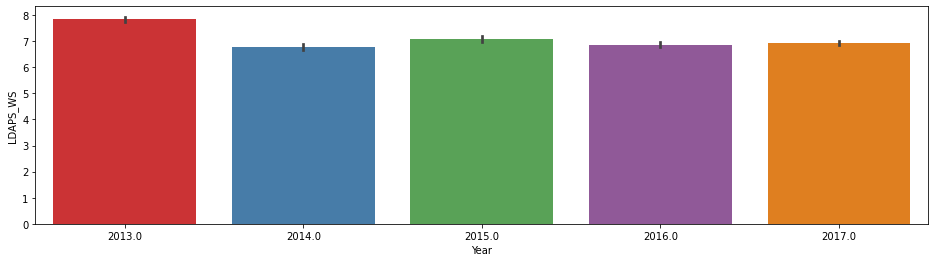

In [205]:
# to visualize 'Average Wind Speed' vs 'Year'
plt.subplots(figsize=(16,4))
sns.barplot(x='Year', y='LDAPS_WS',data=df, palette='Set1')

#### In the year 2013, average wind speed forecasted by LDAPS was highest. 

<AxesSubplot:xlabel='Year', ylabel='LDAPS_LH'>

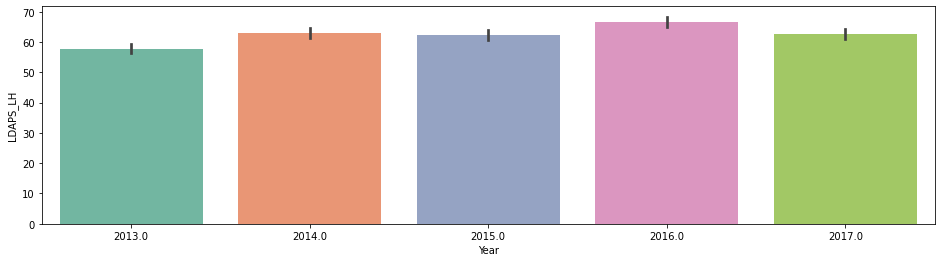

In [206]:
# to visualize
plt.subplots(figsize=(16,4))
sns.barplot(x='Year', y='LDAPS_LH', data=df, palette='Set2')

#### In the year 2016, average latent heat flux forecasted by LDAPS was highest.

In [207]:
last_column = df.pop('Next_Tmax')
df.insert(24, 'Next_Tmax', last_column)  # inserting Next_Tmax at the last column as its our target/label

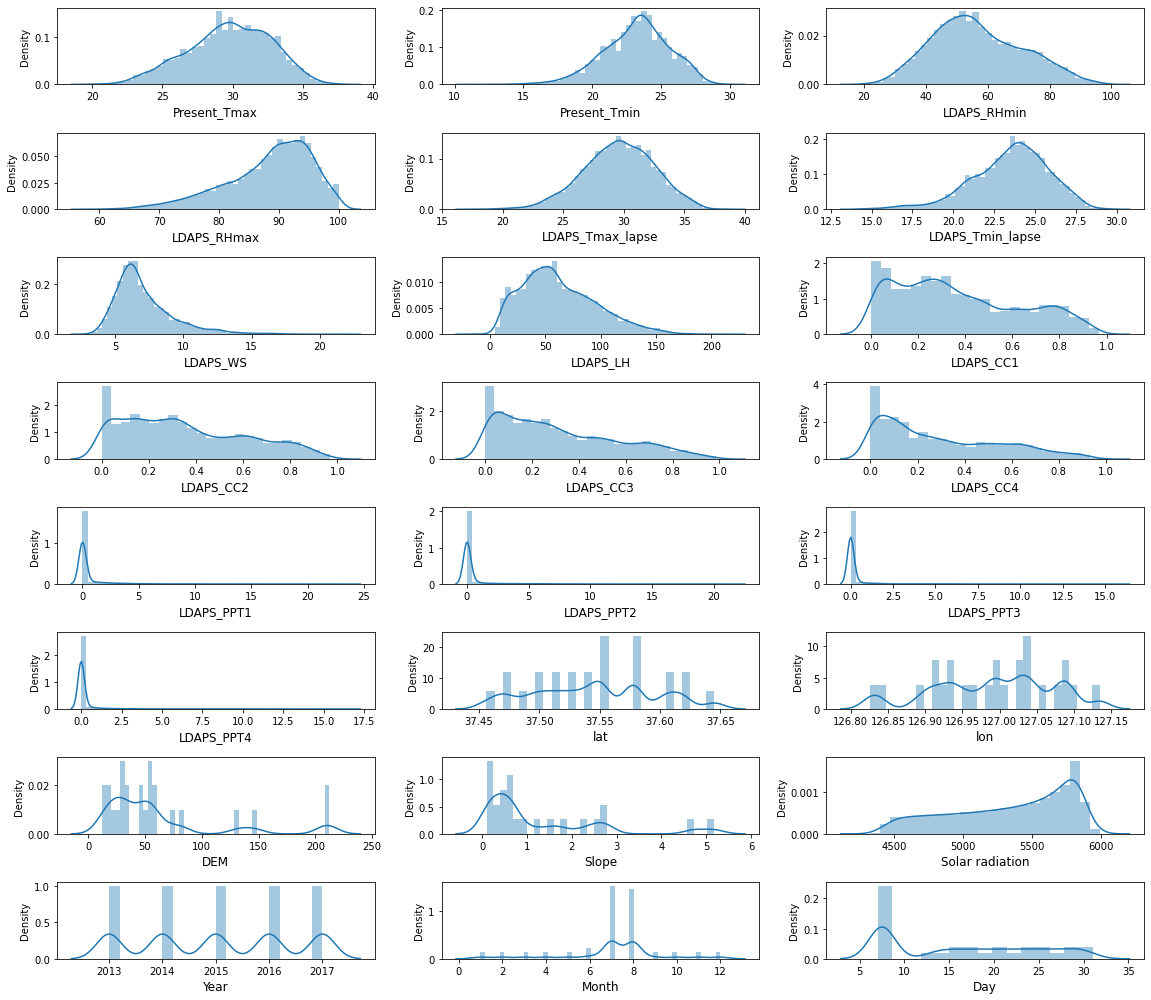

In [208]:
# to visualize data distribution 
plt.figure(figsize=(16,14), facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=24:
        ax=plt.subplot(8,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

#### Inferences from above plot
1. Present_Tmin, LDAPS_RHmax, LDAPS_Tmax_lapse and LDAPS_Tmin_lapse are left-skewed. 

2. LDAPS_WS, LDAPS_LH, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3 and LDAPS_PPT4 are right-skewed

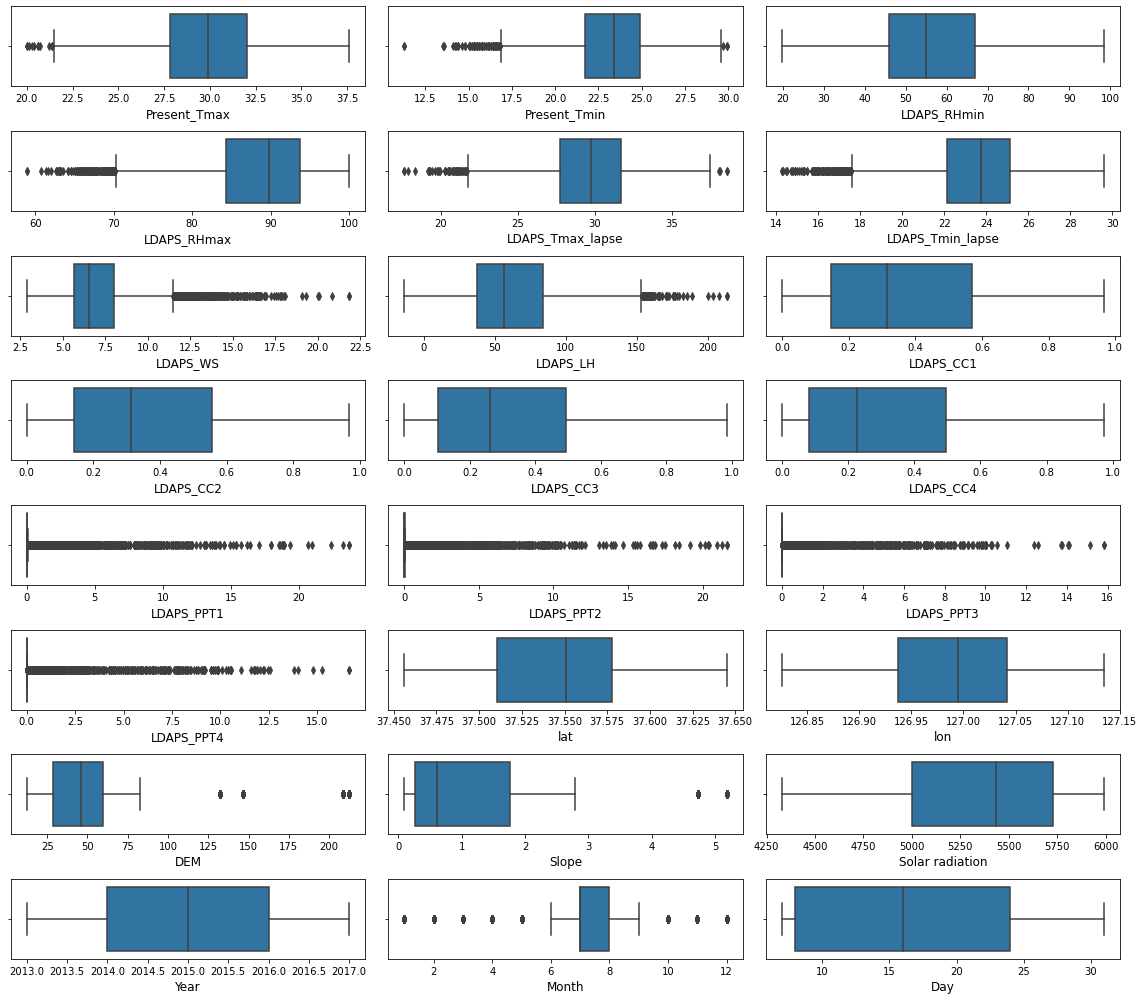

In [209]:
# Lets visualize the columns in boxplot to check outliers

df=df.select_dtypes(include=float)
plt.figure(figsize=(16,14))
plot=1
for col in df:
    if plot<=24:
        plt.subplot(8,3,plot)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=12)
        plot=plot+1
plt.tight_layout()

In [210]:
# Using 1.5 IQR method to remove outliers

def outlier(df,col):
    lower_boundary=df[col].mean()-1.5*df[col].std()
    upper_boundary=df[col].mean()+1.5*df[col].std()
    print(lower_boundary,upper_boundary)
    df.loc[df[col]> upper_boundary,col] = upper_boundary
    df.loc[df[col]<lower_boundary,col]=lower_boundary

In [211]:
outlier(df,'Present_Tmax')
outlier(df,'Present_Tmin')
outlier(df,'LDAPS_RHmax')
outlier(df,'LDAPS_Tmax_lapse')
outlier(df,'LDAPS_Tmin_lapse')
outlier(df,'LDAPS_Tmin_lapse')
outlier(df,'LDAPS_LH')
outlier(df,'DEM')
outlier(df,'LDAPS_PPT1')
outlier(df,'LDAPS_PPT2')
outlier(df,'LDAPS_PPT3')
outlier(df,'LDAPS_PPT4')
outlier(df,'Next_Tmax')

25.334526221132364 34.20427666844438
19.62199876288498 26.831277810902424
77.65082265222398 99.12623628378273
25.21495087731038 34.01368330501146
20.013836503128815 27.016132265834138
20.56704511732427 26.63330542355496
12.093146840137862 112.8077668034397
-19.551698330583648 143.28764286103115
-2.319530598518731 3.4920646494640355
-2.152040170150804 3.1126605639038996
-1.459234077171361 2.0102502357657874
-1.5341798300533838 2.0677815394906904
25.591792718648637 34.95954887061867


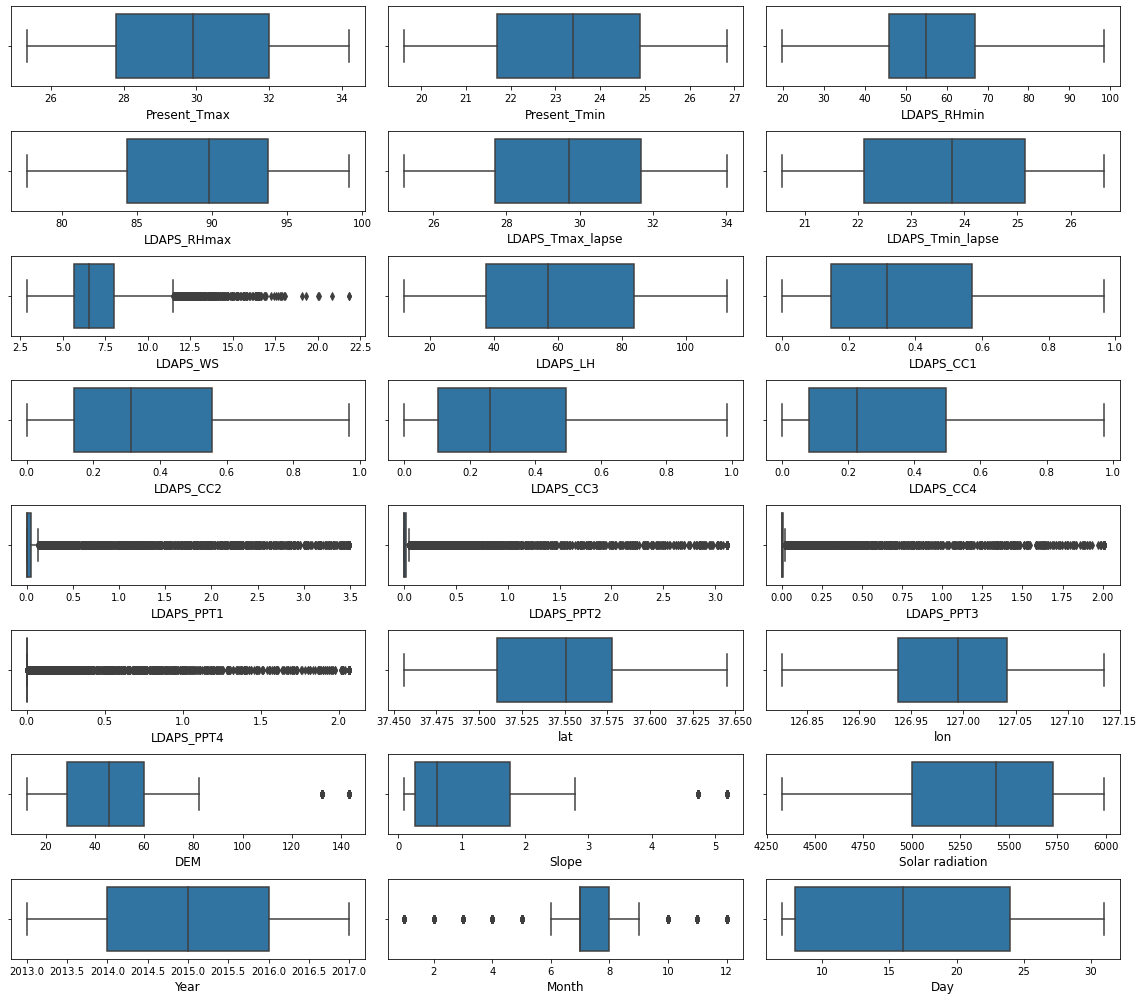

In [212]:
# again visualizing through boxplot after removing outliers

df=df.select_dtypes(include=float)
plt.figure(figsize=(16,14))
plot=1
for col in df:
    if plot<=24:
        plt.subplot(8,3,plot)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=12)
        plot=plot+1
plt.tight_layout()

#### Now our data does not have extreme outliers.

In [213]:
# to see skewness for every continous column stored in data_new
for col in df:
    print(col)
    print(skew(df[col]))

Present_Tmax
-0.11307510886135277
Present_Tmin
-0.0789241886539043
LDAPS_RHmin
0.30350666911236784
LDAPS_RHmax
-0.3789297253715817
LDAPS_Tmax_lapse
-0.05109326191580957
LDAPS_Tmin_lapse
-0.11099220323673274
LDAPS_WS
1.5846678601176412
LDAPS_LH
0.24796048199678844
LDAPS_CC1
0.46491267811106024
LDAPS_CC2
0.4769488081501949
LDAPS_CC3
0.6465452215138411
LDAPS_CC4
0.6735698805921485
LDAPS_PPT1
2.576695032243986
LDAPS_PPT2
2.959112127152252
LDAPS_PPT3
3.370011012426554
LDAPS_PPT4
3.518270725118691
lat
0.08704498998241751
lon
-0.28515783154759344
DEM
1.1982439030181444
Slope
1.5627175418427217
Solar radiation
-0.5111107954764683
Year
0.0
Month
-0.7051668961033425
Day
0.24550076706124568
Next_Tmax
-0.1332302752519543


In [214]:
# Applying log transformation to remove skewness
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

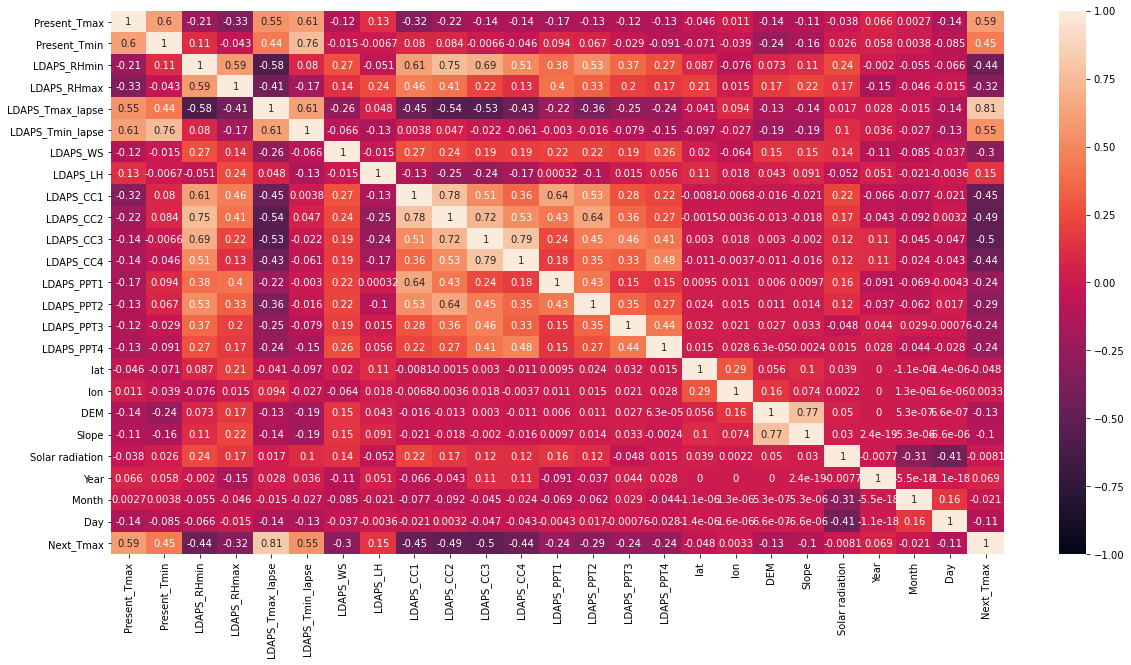

In [215]:
# plotting heatmap to observe the correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, vmin=-1.0, vmax=1.0)
plt.show()

#### Present_Tmax, Present_Tmin, LDAPS_Tmax_lapse and LDAPS_Tmin_lapse are having good co-relation with target variable(Next_Tmax)

In [216]:
y = df['Next_Tmax']
X = df.drop('Next_Tmax', axis = 1)

In [217]:
# Data Scaling.  Formula Z=(x-mean)/std
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [218]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled, i) for i in range (X_scaled.shape[1])]
vif["features"] = X.columns

#let's check the values
vif

,vif,features
0,2.613280,Present_Tmax
1,2.997423,Present_Tmin
2,5.967825,LDAPS_RHmin
3,2.517865,LDAPS_RHmax
4,6.084797,LDAPS_Tmax_lapse
5,5.673351,LDAPS_Tmin_lapse
6,1.286357,LDAPS_WS
7,1.491580,LDAPS_LH
8,4.172717,LDAPS_CC1
9,5.731572,LDAPS_CC2


#### Multicollinearity problem exist. LDAPS_Tmax_lapse and LDAPS_RHmin are co-related to each other.

In [219]:
df=df.drop(columns='LDAPS_Tmax_lapse')

In [221]:
# Split data into train and test. Model will be built on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25, random_state = 101)

In [222]:
y_train.head()

1982    30.0
6872    30.6
783     32.5
5795    34.4
1250    30.1
Name: Next_Tmax, dtype: float64

In [223]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [224]:
# lets check how well model fits the test data
regression.score(x_test,y_test)

0.7575657607765023

In [225]:
# To cross verify
y_pred = regression.predict(x_test)

In [226]:
r2_score(y_test,y_pred)

0.7575657607765023

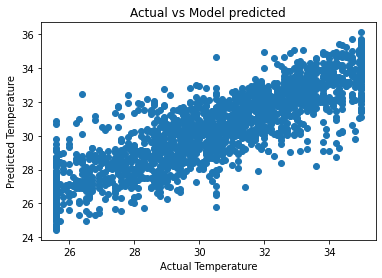

In [227]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Model predicted')
plt.show()

In [228]:
mean_absolute_error(y_test,y_pred)

1.0544397371814795

In [229]:
mean_squared_error(y_test,y_pred)

1.9555220768860908

In [230]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.3983998272618925

In [231]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(regression,X_scaled,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.64343935 0.63683689 0.67542087 0.77529113 0.53460373]
0.6531183958250095
0.07723739311547693


### Using Regularization method to check whether our regression model is overfitting or not

In [232]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

### Lasso Regularization

In [233]:
# LassoCV will return best alpha after max iteration
# Normalize is subtracting the mean and dividingby the l2-norm
lasscv = LassoCV(alphas = None, max_iter = 1000, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [234]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

2.9713421143101693e-05

In [235]:
# now that we have best parameter, lets use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=2.9713421143101693e-05)

In [236]:
lasso_reg.score(x_test,y_test)

0.757566730354613

### Using Ridge regression model

In [237]:
# RidgeCV will return best alpha and coefficients after performing 10 cross validations.
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [238]:
ridgecv.alpha_

0.001

In [239]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [240]:
ridge_model.score(x_test,y_test)

0.757565757309957

#### So we can see by using different type of regularization,we still are getting almost same r2 score. That means our linear regression model has been well trained over the training data and there is no overfitting.

## DecisionTree Regressor

In [241]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

print("\n===================Train Result======================")

print(f"Accuracy Score: {dt_reg.score(x_train,y_train) * 100:.2f}%")
print("______________________________________________")

#*********************** Test Score *************************

y_pred = dt_reg.predict(x_test)
print("\n===================Test Result======================")
print(f"Accuracy Score: {dt_reg.score(x_test,y_test) * 100:.2f}%")
print("______________________________________________")


===================Train Result======================
Accuracy Score: 100.00%
______________________________________________

===================Test Result======================
Accuracy Score: 79.63%
______________________________________________


In [242]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(dt_reg,X_scaled,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.36044924 0.2777066  0.31078803 0.61436623 0.40029654]
0.39272132806379
0.11846247222144944


## Random Forest Regressor

In [243]:
rand_reg = RandomForestRegressor(n_estimators = 100,random_state=101)
rand_reg.fit(x_train,y_train)

print("\n===================Train Result======================")

print(f"Accuracy Score: {rand_reg.score(x_train,y_train) * 100:.2f}%")
print("______________________________________________")

#*********************** Test Score *************************

y_pred = rand_reg.predict(x_test)
print("\n===================Test Result======================")
print(f"Accuracy Score: {rand_reg.score(x_test,y_test) * 100:.2f}%")
print("______________________________________________")


===================Train Result======================
Accuracy Score: 98.58%
______________________________________________

===================Test Result======================
Accuracy Score: 90.22%
______________________________________________


In [244]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(rand_reg,X_scaled,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.71073222 0.63311925 0.62238702 0.80052674 0.59335801]
0.6720246467364406
0.07506933897139391


## KNN Regressor

In [245]:
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)

print("\n===================Train Result======================")

print(f"Accuracy Score: {knn.score(x_train,y_train) * 100:.2f}%")
print("______________________________________________")

#*********************** Test Score *************************

y_pred = knn.predict(x_test)
print("\n===================Test Result======================")
print(f"Accuracy Score: {knn.score(x_test,y_test) * 100:.2f}%")
print("______________________________________________")


===================Train Result======================
Accuracy Score: 94.18%
______________________________________________

===================Test Result======================
Accuracy Score: 89.27%
______________________________________________


In [246]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(knn,X_scaled,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.43851074 0.31705459 0.37746716 0.63840768 0.48812573]
0.4519131786308696
0.10954471385688293


## Gradient Boosting Regressor

In [247]:
from sklearn.ensemble import GradientBoostingRegressor
np.random.seed(42)

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

y_preds = gbr.predict(x_test)
y_preds

gbr.score(x_test, y_test)

0.8572946308950846

In [248]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(gbr,X_scaled,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.67646845 0.68708261 0.65127441 0.7799374  0.61295582]
0.6815437390872269
0.05542253113557079


## XGBRegressor 

In [249]:
from xgboost.sklearn import XGBRegressor
np.random.seed(42)
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
predictions = xgb.predict(x_test)

xgb.score(x_test,y_test)

0.9202571244682989

In [250]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(xgb,X_scaled,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.68456174 0.60521498 0.6133326  0.76257964 0.57723027]
0.6485838457803317
0.06708843618513018


In [251]:
accuracy =[75.75,80.21,90.22,89.27,85.72,92.02]
cross_val_score=[65.31,38.04,67.20,45.19,68.15,64.85]

model=['Linear Regression','Decision Tree','Random Forest','KNN','Gradient','XGBoost']
best_model=pd.DataFrame({'Model':model,'Accuracy':accuracy,'Cross validation score':cross_val_score})
best_model

,Model,Accuracy,Cross validation score
0,Linear Regression,75.75,65.31
1,Decision Tree,80.21,38.04
2,Random Forest,90.22,67.20
3,KNN,89.27,45.19
4,Gradient,85.72,68.15
5,XGBoost,92.02,64.85


In [ ]:
# Linear Regression model is our best model because difference between accuracy and CV score is least than other models.

### Using GridSearchCV for hyper parameter tuning on best model (Linear Regression)

In [253]:
# we are tuning three hyperparameters right now, we are passing different values for both parameters
grid_param = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [254]:
grid_search = GridSearchCV(estimator=regression,
                          param_grid=grid_param,
                          cv=3,
                          n_jobs =-1)

In [255]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [256]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [257]:
regression = LinearRegression(copy_X= True, fit_intercept= True, normalize= True)
regression.fit(x_train,y_train)

LinearRegression(normalize=True)

In [258]:
regression.score(x_test,y_test)

0.7575657607765023

In [259]:
# After applying hyperparameter tuning still getting same score.

## Model Saving

In [347]:
file_name = 'Max Temperature Forecast.pickle'
pickle.dump(regression,open(file_name,'wb'))

In [348]:
# Model has been saved successfully. Let's check by predicting with the loaded model.

### Loading and predicting with the loaded model

In [349]:
# loading the saved model
loaded_model = pickle.load(open(file_name,'rb'))

In [350]:
# predicting with the loaded model
predictions = loaded_model.predict(x_test)

## Predicting for Next_Tmin

In [351]:
# reading the data
df=pd.read_csv(r'D:\DATATRAINED\DTRND-Project\EVALUATION\3rd week\temperature.csv') 

In [352]:
df.head() # to display top 5 rows

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [353]:
# We have two targets to predict, so dropping 1st target variable 'Next_Tmax'
df=df.drop(columns='Next_Tmax')

In [354]:
# dropping 'station' column because its just a serial number
df=df.drop(columns='station')

In [355]:
# to change format
df['Date']=pd.to_datetime(df['Date'])
df['Date']

0      2013-06-30
1      2013-06-30
2      2013-06-30
3      2013-06-30
4      2013-06-30
          ...    
7747   2017-08-30
7748   2017-08-30
7749   2017-08-30
7750          NaT
7751          NaT
Name: Date, Length: 7752, dtype: datetime64[ns]

In [356]:
# splitting Date into Year,Month and Day
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

In [357]:
# dropping 'Date' column
df.drop('Date',axis=1,inplace=True)

In [358]:
df.isnull().sum()  # to check null values 

Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmin           27
Year                 2
Month                2
Day                  2
dtype: int64

#### Null values present in data.

In [359]:
# treating null values 

df['Present_Tmax']=df['Present_Tmax'].fillna(df['Present_Tmax'].median())
df['Present_Tmin']=df['Present_Tmin'].fillna(df['Present_Tmin'].median())

df['LDAPS_RHmin']=df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].median())
df['LDAPS_RHmax']=df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].median())

df['LDAPS_Tmax_lapse']=df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].median())
df['LDAPS_Tmin_lapse']=df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].median())

df['LDAPS_WS']=df['LDAPS_WS'].fillna(df['LDAPS_WS'].median())
df['LDAPS_LH']=df['LDAPS_LH'].fillna(df['LDAPS_LH'].median())

df['LDAPS_CC1']=df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].median())
df['LDAPS_CC2']=df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].median())
df['LDAPS_CC3']=df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].median())
df['LDAPS_CC4']=df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].median())

df['LDAPS_PPT1']=df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].median())
df['LDAPS_PPT2']=df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].median())
df['LDAPS_PPT3']=df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].median())
df['LDAPS_PPT4']=df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].median())

df['Year']=df['Year'].fillna(df['Year'].median())
df['Month']=df['Month'].fillna(df['Month'].median())
df['Day']=df['Day'].fillna(df['Day'].median())
df['Next_Tmin']=df['Next_Tmin'].fillna(df['Next_Tmin'].median())

In [360]:
df.isnull().sum()  # to check null values again 

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmin           0
Year                0
Month               0
Day                 0
dtype: int64

#### No null values

In [361]:
last_column = df.pop('Next_Tmin')
df.insert(24, 'Next_Tmin', last_column)  # inserting Next_Tmiin at the last column as its our target/label

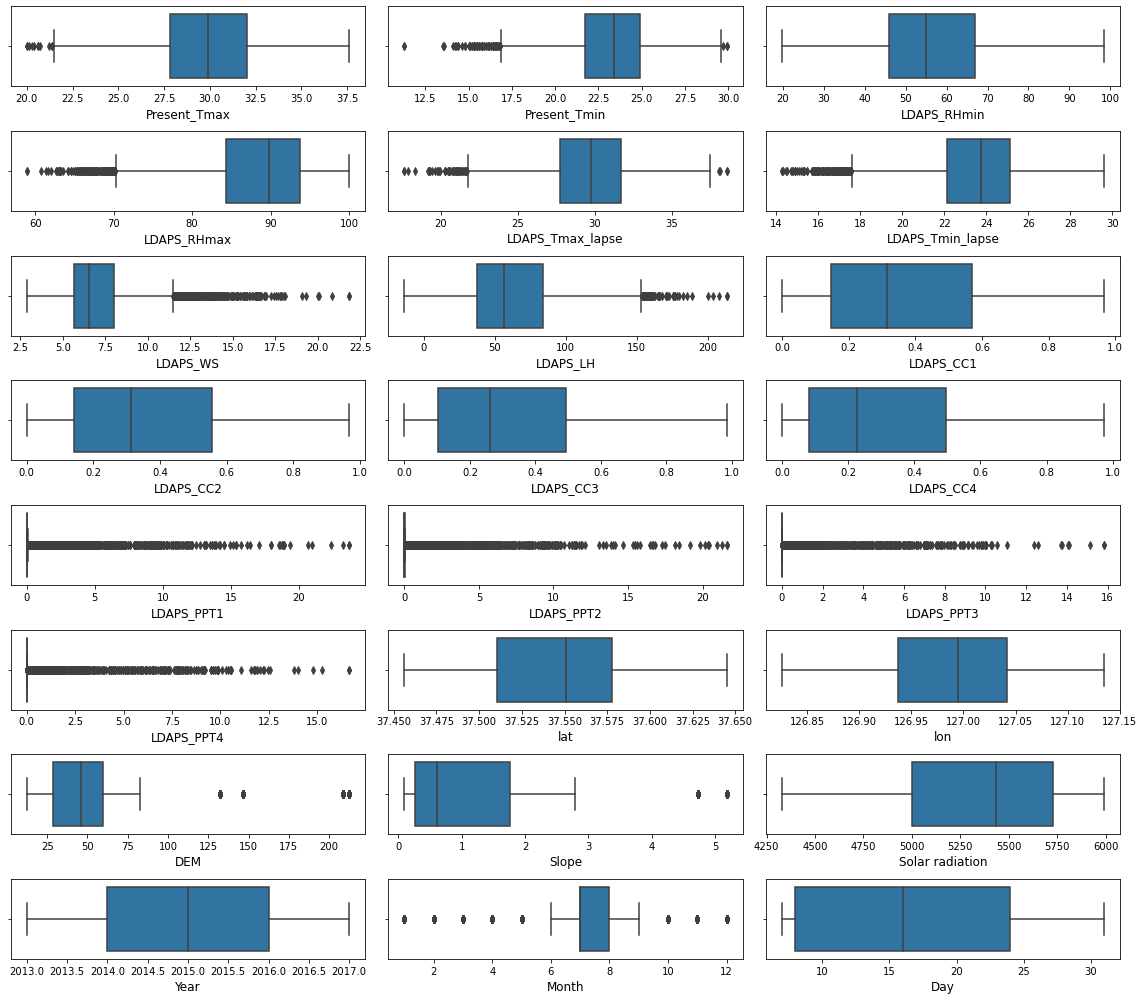

In [362]:
# Lets visualize the columns in boxplot to check outliers

df=df.select_dtypes(include=float)
plt.figure(figsize=(16,14))
plot=1
for col in df:
    if plot<=24:
        plt.subplot(8,3,plot)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=12)
        plot=plot+1
plt.tight_layout()

In [363]:
# Using 1.5 IQR method to remove outliers

def outlier(df,col):
    lower_boundary=df[col].mean()-1.5*df[col].std()
    upper_boundary=df[col].mean()+1.5*df[col].std()
    print(lower_boundary,upper_boundary)
    df.loc[df[col]> upper_boundary,col] = upper_boundary
    df.loc[df[col]<lower_boundary,col]=lower_boundary

In [364]:
outlier(df,'Present_Tmax')
outlier(df,'Present_Tmin')
outlier(df,'LDAPS_RHmax')
outlier(df,'LDAPS_Tmax_lapse')
outlier(df,'LDAPS_Tmin_lapse')
outlier(df,'LDAPS_Tmin_lapse')
outlier(df,'LDAPS_LH')
outlier(df,'DEM')
outlier(df,'LDAPS_PPT1')
outlier(df,'LDAPS_PPT2')
outlier(df,'LDAPS_PPT3')
outlier(df,'LDAPS_PPT4')
outlier(df,'Next_Tmin')

25.334526221132364 34.20427666844438
19.62199876288498 26.831277810902424
77.65082265222398 99.12623628378273
25.21495087731038 34.01368330501146
20.013836503128815 27.016132265834138
20.56704511732427 26.63330542355496
12.093146840137862 112.8077668034397
-19.551698330583648 143.28764286103115
-2.319530598518731 3.4920646494640355
-2.152040170150804 3.1126605639038996
-1.459234077171361 2.0102502357657874
-1.5341798300533838 2.0677815394906904
19.207860490577218 26.6577483845518


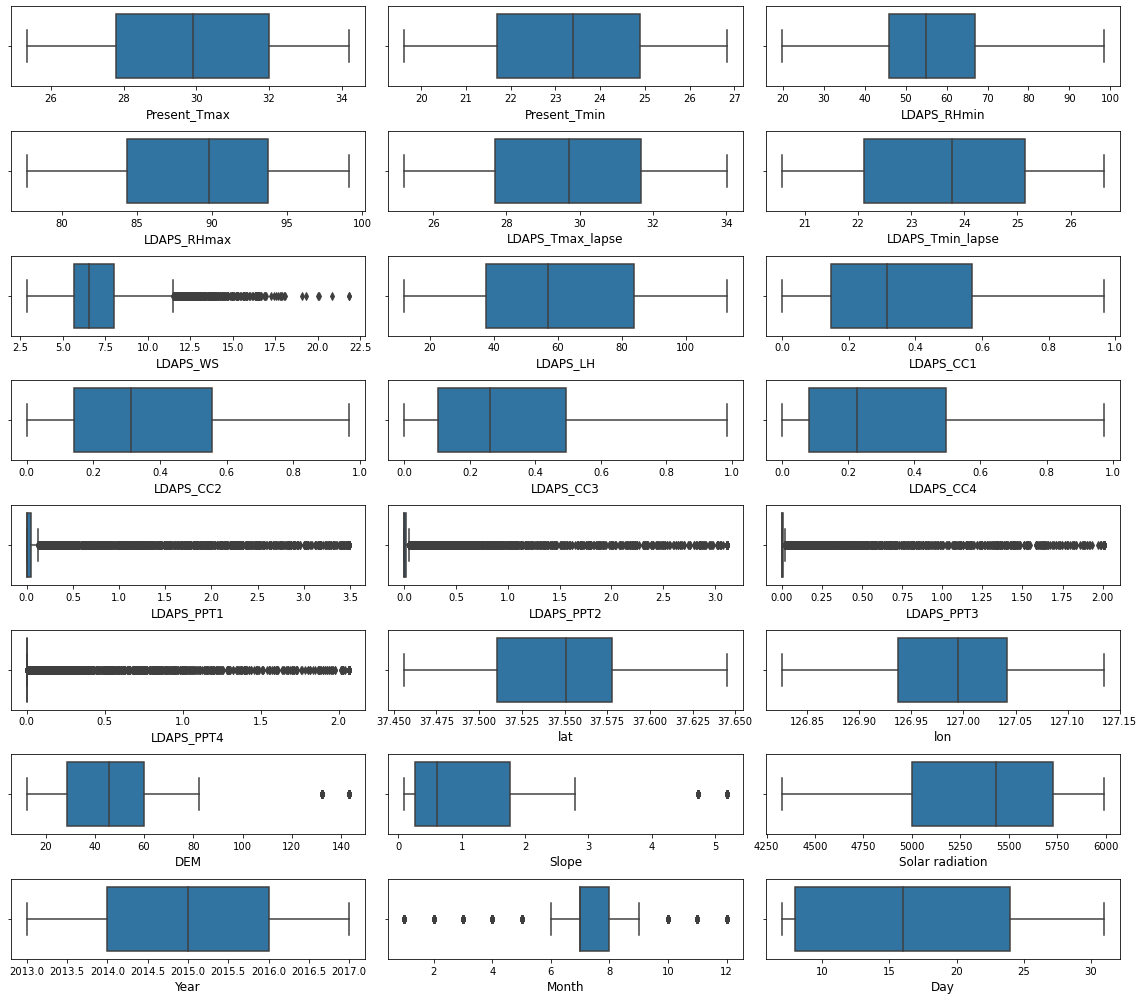

In [365]:
# again visualizing through boxplot after removing outliers

df=df.select_dtypes(include=float)
plt.figure(figsize=(16,14))
plot=1
for col in df:
    if plot<=24:
        plt.subplot(8,3,plot)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=12)
        plot=plot+1
plt.tight_layout()

In [366]:
# to see skewness for every continous column stored in data_new
for col in df:
    print(col)
    print(skew(df[col]))

Present_Tmax
-0.11307510886135277
Present_Tmin
-0.0789241886539043
LDAPS_RHmin
0.30350666911236784
LDAPS_RHmax
-0.3789297253715817
LDAPS_Tmax_lapse
-0.05109326191580957
LDAPS_Tmin_lapse
-0.11099220323673274
LDAPS_WS
1.5846678601176412
LDAPS_LH
0.24796048199678844
LDAPS_CC1
0.46491267811106024
LDAPS_CC2
0.4769488081501949
LDAPS_CC3
0.6465452215138411
LDAPS_CC4
0.6735698805921485
LDAPS_PPT1
2.576695032243986
LDAPS_PPT2
2.959112127152252
LDAPS_PPT3
3.370011012426554
LDAPS_PPT4
3.518270725118691
lat
0.08704498998241751
lon
-0.28515783154759344
DEM
1.1982439030181444
Slope
1.5627175418427217
Solar radiation
-0.5111107954764683
Year
0.0
Month
-0.7051668961033425
Day
0.24550076706124568
Next_Tmin
-0.0840959550686117


In [367]:
# Applying log transformation to remove skewness
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

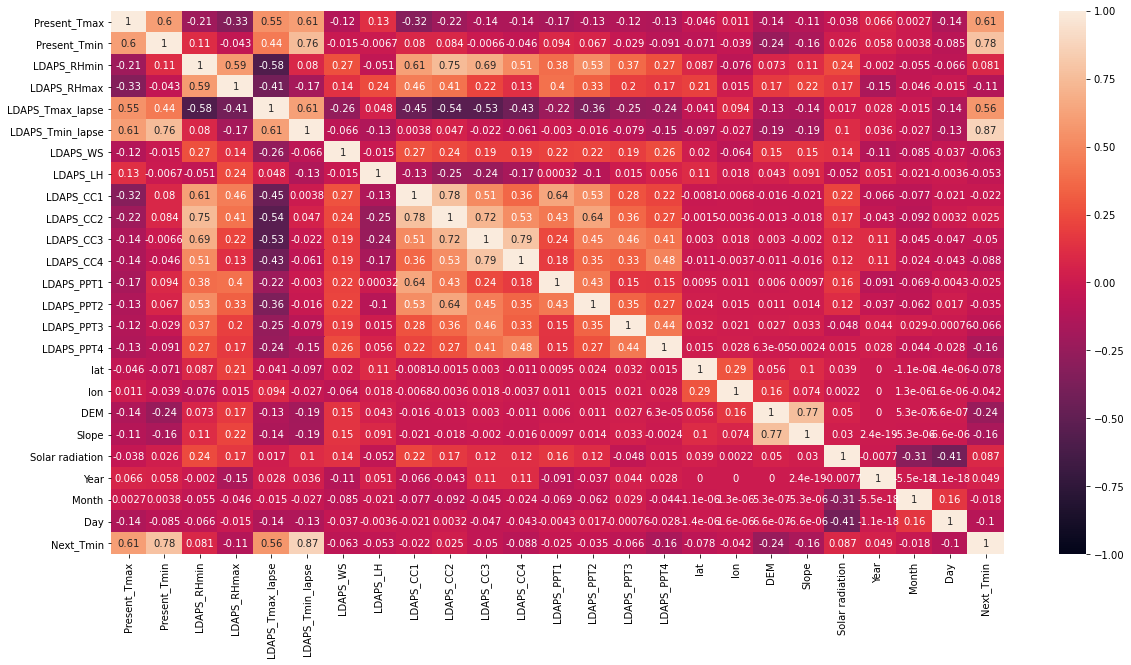

In [368]:
# plotting heatmap to observe the correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, vmin=-1.0, vmax=1.0)
plt.show()

#### Present_Tmax,Present_Tmin,LDAPS_Tmax_lapse and LDAPS_Tmin_lapse have good corelation with target(Next_Tmin) variable.

In [369]:
y = df['Next_Tmin']
X = df.drop('Next_Tmin', axis = 1)

In [370]:
# Data Scaling.  Formula Z=(x-mean)/std
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [371]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled, i) for i in range (X_scaled.shape[1])]
vif["features"] = X.columns

#let's check the values
vif

,vif,features
0,2.613280,Present_Tmax
1,2.997423,Present_Tmin
2,5.967825,LDAPS_RHmin
3,2.517865,LDAPS_RHmax
4,6.084797,LDAPS_Tmax_lapse
5,5.673351,LDAPS_Tmin_lapse
6,1.286357,LDAPS_WS
7,1.491580,LDAPS_LH
8,4.172717,LDAPS_CC1
9,5.731572,LDAPS_CC2


#### Multicollinearity problem exist. LDAPS_Tmax_lapse and LDAPS_RHmin are co-related to each other.

In [372]:
df=df.drop(columns='LDAPS_Tmax_lapse')

In [373]:
# Split data into train and test. Model will be built on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25, random_state = 51)

In [374]:
y_train.head()

804     24.6
7462    22.1
4105    25.3
409     23.3
520     25.3
Name: Next_Tmin, dtype: float64

### Linear Regression

In [375]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [376]:
# Adjusted R2 score
regression.score(x_train,y_train)

0.8218663672320049

In [377]:
# lets check how well model fits the test data
regression.score(x_test,y_test)

0.8196728610711972

In [378]:
# To cross verify
y_pred = regression.predict(x_test)

In [379]:
r2_score(y_test,y_pred)

0.8196728610711972

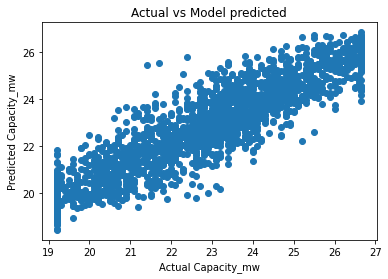

In [380]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Capacity_mw')
plt.ylabel('Predicted Capacity_mw')
plt.title('Actual vs Model predicted')
plt.show()

In [381]:
mean_absolute_error(y_test,y_pred)

0.7154318059175329

In [382]:
mean_squared_error(y_test,y_pred)

0.8350959112341777

In [383]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.9138358229103178

In [384]:
from sklearn.model_selection import cross_val_score

In [385]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(regression,X_scaled,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.67437089 0.64030704 0.78446501 0.86375597 0.81781461]
0.7561427033757782
0.08519474395275439


## Using Regularization method to check whether our regression model is overfitting or not

In [386]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

### Lasso Regularization

In [387]:
# LassoCV will return best alpha after max iteration
# Normalize is subtracting the mean and dividingby the l2-norm
lasscv = LassoCV(alphas = None, max_iter = 1000, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [388]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

2.5070153936923137e-05

In [389]:
# now that we have best parameter, lets use Lasso regression and see how well our data has fitted before
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=2.5070153936923137e-05)

In [390]:
lasso_reg.score(x_test,y_test)

0.8196732797509638

### Using Ridge regression model

In [391]:
# RidgeCV will return best alpha and coefficients after performing 10 cross validations.
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [392]:
ridgecv.alpha_

0.001

In [393]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [394]:
ridge_model.score(x_test,y_test)

0.819672867953912

#### So we can see by using different type of regularization,we still are getting the same r2 score. That means our linear regression model has been well trained over the training data and there is no overfitting.

##  Decision Tree Regressor

In [395]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

print("\n===================Train Result======================")

print(f"Accuracy Score: {dt_reg.score(x_train,y_train) * 100:.2f}%")
print("______________________________________________")

#*********************** Test Score *************************

y_pred = dt_reg.predict(x_test)
print("\n===================Test Result======================")
print(f"Accuracy Score: {dt_reg.score(x_test,y_test) * 100:.2f}%")
print("______________________________________________")


===================Train Result======================
Accuracy Score: 100.00%
______________________________________________

===================Test Result======================
Accuracy Score: 77.66%
______________________________________________


In [396]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(dt_reg,X_scaled,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.38083477 0.40814424 0.59191216 0.67425952 0.60310876]
0.5316518908361042
0.11582250616567345


## Random Forest Regressor

In [397]:
rand_reg = RandomForestRegressor(n_estimators = 100,random_state=51)
rand_reg.fit(x_train,y_train)

print("\n===================Train Result======================")

print(f"Accuracy Score: {rand_reg.score(x_train,y_train) * 100:.2f}%")
print("______________________________________________")

#*********************** Test Score *************************

y_pred = rand_reg.predict(x_test)
print("\n===================Test Result======================")
print(f"Accuracy Score: {rand_reg.score(x_test,y_test) * 100:.2f}%")
print("______________________________________________")


===================Train Result======================
Accuracy Score: 98.62%
______________________________________________

===================Test Result======================
Accuracy Score: 89.71%
______________________________________________


In [398]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(rand_reg,X_scaled,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.6574093  0.65489163 0.79527732 0.85473418 0.83150751]
0.7587639874339619
0.08590385397460003


## KNN Regressor

In [399]:
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)

print("\n===================Train Result======================")

print(f"Accuracy Score: {knn.score(x_train,y_train) * 100:.2f}%")
print("______________________________________________")

#*********************** Test Score *************************

y_pred = knn.predict(x_test)
print("\n===================Test Result======================")
print(f"Accuracy Score: {knn.score(x_test,y_test) * 100:.2f}%")
print("______________________________________________")


===================Train Result======================
Accuracy Score: 93.73%
______________________________________________

===================Test Result======================
Accuracy Score: 88.58%
______________________________________________


In [400]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(knn,X_scaled,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.26752301 0.37180209 0.58157659 0.694251   0.67473901]
0.5179783430628375
0.16957951764179005


## Gradient Boosting Regressor

In [401]:
from sklearn.ensemble import GradientBoostingRegressor
np.random.seed(42)

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

y_preds = gbr.predict(x_test)
y_preds

gbr.score(x_test, y_test)

0.8797560388691147

In [402]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(gbr,X,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.68716169 0.65329371 0.80410515 0.86633561 0.85735423]
0.7736500789790356
0.08773870395731138


## XGBoost

In [403]:
from xgboost.sklearn import XGBRegressor
np.random.seed(101)
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
predictions = xgb.predict(x_test)

xgb.score(x_test,y_test)

0.9286110328014272

In [404]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(xgb,X,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.65865644 0.6276525  0.7679506  0.85589749 0.84013339]
0.7500580832841051
0.09270714386326007


In [405]:
accuracy =[81.96,77.70,89.71,88.,87.97,92.86]
cross_val_score=[75.61,54.10,75.87,51.79,77.36,75.00]

model=['Linear Regression','Decision Tree','Random Forest','KNN','Gradient','XGBoost']
best_model=pd.DataFrame({'Model':model,'Accuracy':accuracy,'Cross validation score':cross_val_score})
best_model

,Model,Accuracy,Cross validation score
0,Linear Regression,81.96,75.61
1,Decision Tree,77.70,54.10
2,Random Forest,89.71,75.87
3,KNN,88.00,51.79
4,Gradient,87.97,77.36
5,XGBoost,92.86,75.00


#### Linear Regression model is our best model because accuracy and CV score is giving least difference value than other models.

### Using GridSearchCV for hyper parameter tuning on best model (Linear Regression)

In [406]:
grid_param = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [407]:
grid_search = GridSearchCV(estimator=regression,
                          param_grid=grid_param,
                          cv=3,
                          n_jobs =-1)

In [408]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [409]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [410]:
regression = LinearRegression(copy_X= True, fit_intercept= True, normalize= True)
regression.fit(x_train,y_train)

LinearRegression(normalize=True)

In [411]:
regression.score(x_test,y_test)

0.8196728610711972

In [412]:
# After applying hyperparameter tuning still getting approximately same accuracy score.

## Model Saving

In [414]:
filename = 'Min Temperature Forecast.pickle'
pickle.dump(regression,open(filename,'wb'))

In [415]:
# Model has been saved successfully. Let's check by predicting with the loaded model.

## Loading and predicting with the loaded model

In [416]:
# loading the saved model
loaded_model = pickle.load(open(filename,'rb'))

In [417]:
# predicting with the loaded model
predictions = loaded_model.predict(x_test)